In [29]:
import seaborn as sns;

df=sns.load_dataset('titanic')
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
df.dropna().shape

(182, 15)

In [8]:
df.dropna(axis=1)

survived  pclass     sex  sibsp  parch     fare   class    who  \
0           0       3    male      1      0   7.2500   Third    man   
1           1       1  female      1      0  71.2833   First  woman   
2           1       3  female      0      0   7.9250   Third  woman   
3           1       1  female      1      0  53.1000   First  woman   
4           0       3    male      0      0   8.0500   Third    man   
..        ...     ...     ...    ...    ...      ...     ...    ...   
886         0       2    male      0      0  13.0000  Second    man   
887         1       1  female      0      0  30.0000   First  woman   
888         0       3  female      1      2  23.4500   Third  woman   
889         1       1    male      0      0  30.0000   First    man   
890         0       3    male      0      0   7.7500   Third    man   

     adult_male alive  alone  
0          True    no  False  
1         False   yes  False  
2         False   yes   True  
3         False   yes  False  
4          True    no   True  
..          ...   ...    ...  
886        True    no   True  
887       False   yes   True  
888       False    no  False  
889        True   yes   True  
890        True    no   True  

[891 rows x 11 columns]

Impuatation Techniques

<Axes: xlabel='age', ylabel='Count'>

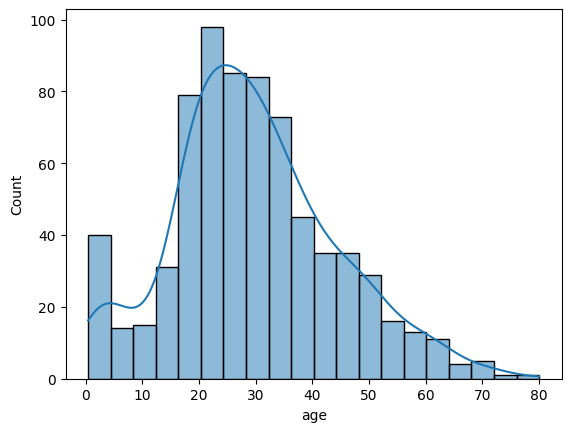

In [10]:
sns.histplot(df['age'],kde=True)

IT looks like normal so calculate mean and replace with missing values!!

In [11]:
df['age_mean']=df['age'].fillna(df['age'].mean())

In [12]:
df[['age','age_mean']]

age   age_mean
0    22.0  22.000000
1    38.0  38.000000
2    26.0  26.000000
3    35.0  35.000000
4    35.0  35.000000
..    ...        ...
886  27.0  27.000000
887  19.0  19.000000
888   NaN  29.699118
889  26.0  26.000000
890  32.0  32.000000

[891 rows x 2 columns]

MEan Imputation works well when we have normally distriuted data 

### Median Value Imputation - When we have outliers in the dataset

In [14]:
df['age_median']=df['age'].fillna(df['age'].median())

In [16]:
df[['age','age_median','age_mean']]

age  age_median   age_mean
0    22.0        22.0  22.000000
1    38.0        38.0  38.000000
2    26.0        26.0  26.000000
3    35.0        35.0  35.000000
4    35.0        35.0  35.000000
..    ...         ...        ...
886  27.0        27.0  27.000000
887  19.0        19.0  19.000000
888   NaN        28.0  29.699118
889  26.0        26.0  26.000000
890  32.0        32.0  32.000000

[891 rows x 3 columns]

### Mode Imputation ( HElps for categorical values also)

In this dataset, Embarked(In which port passengers are boarded) has some NaN values we can change them with mode

In [21]:
mode_value=df['embarked'].mode()[0] ### It will consider NaN also as a value if there are more NaNs then mode will be NaN so to avoid that use below one
mode_value=df[df['embarked'].notna()]['embarked'].mode()[0] ## we use [0] because mode can be multi vlaues may be 2 values repeating same umber of times
print(mode_value)

S


In [22]:
df['embarked_mode']=df['embarked'].fillna(mode_value)

In [23]:
df[['embarked_mode','embarked']]

embarked_mode embarked
0               S        S
1               C        C
2               S        S
3               S        S
4               S        S
..            ...      ...
886             S        S
887             S        S
888             S        S
889             C        C
890             Q        Q

[891 rows x 2 columns]

In [27]:
df['embarked_mode'].isnull().sum()

np.int64(0)

In [28]:
df['embarked'].isnull().sum()

np.int64(2)